In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
df = pd.read_csv('/content/tweet_emotions.csv')

In [2]:
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [3]:
import pandas as pd

# Assuming your DataFrame is named 'df'
df = df.rename(columns={'sentiment': 'label', 'content': 'sentence'})

In [4]:
df

,tweet_id,label,sentence
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [5]:
df.isnull().sum()

,0
tweet_id,0
label,0
sentence,0


In [6]:
df.dropna(inplace=True)

In [7]:
df['label'].value_counts()

,count
label,
neutral,8638
worry,8459
happiness,5209
sadness,5165
love,3842
surprise,2187
fun,1776
relief,1526
hate,1323


In [8]:
 df.dropna(inplace=True)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [10]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [11]:
from sklearn.preprocessing import LabelEncoder
le_x= LabelEncoder()

In [18]:
df

,tweet_id,label,sentence
0,1956967341,empty,tiffanylue i know i was listenin to bad habit ...
1,1956967666,sadness,Layin n bed with a headache ughhhhwaitin on yo...
2,1956967696,sadness,Funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON
4,1956968416,neutral,dannycastillo We want to trade with someone wh...
...,...,...,...
39995,1753918954,neutral,JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mothers Day to all the mommies out there...
39998,1753919043,happiness,niariley WASSUP BEAUTIFUL FOLLOW ME PEEP OUT M...


In [19]:
df['label'] = le_x.fit_transform(df.label)

In [20]:
label_mapping = dict(zip(le_x.classes_, le_x.transform(le_x.classes_)))
print(label_mapping)

{'anger': 0, 'boredom': 1, 'empty': 2, 'enthusiasm': 3, 'fun': 4, 'happiness': 5, 'hate': 6, 'love': 7, 'neutral': 8, 'relief': 9, 'sadness': 10, 'surprise': 11, 'worry': 12}


In [21]:
df

,tweet_id,label,sentence
0,1956967341,2,tiffanylue i know i was listenin to bad habit ...
1,1956967666,10,Layin n bed with a headache ughhhhwaitin on yo...
2,1956967696,10,Funeral ceremonygloomy friday
3,1956967789,3,wants to hang out with friends SOON
4,1956968416,8,dannycastillo We want to trade with someone wh...
...,...,...,...
39995,1753918954,8,JohnLloydTaylor
39996,1753919001,7,Happy Mothers Day All my love
39997,1753919005,7,Happy Mothers Day to all the mommies out there...
39998,1753919043,5,niariley WASSUP BEAUTIFUL FOLLOW ME PEEP OUT M...


In [22]:
df['label'].value_counts()

,count
label,
8,8638
12,8459
5,5209
10,5165
7,3842
11,2187
4,1776
9,1526
6,1323


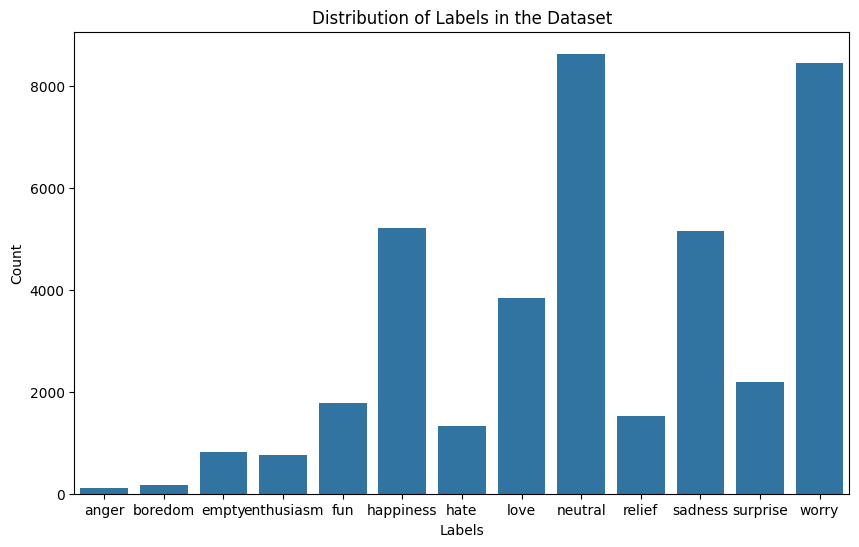

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)

plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution of Labels in the Dataset")

# Fix: Invert the label_mapping to map numerical labels to original labels
inverted_label_mapping = {v: k for k, v in label_mapping.items()}

# Use inverted_label_mapping for tick labels
tick_labels = [inverted_label_mapping[index] for index in label_counts.index]
plt.xticks(label_counts.index, tick_labels)
plt.show()

<ipython-input-24-5006bf3e42e5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')  # Use 'viridis' or any other palette


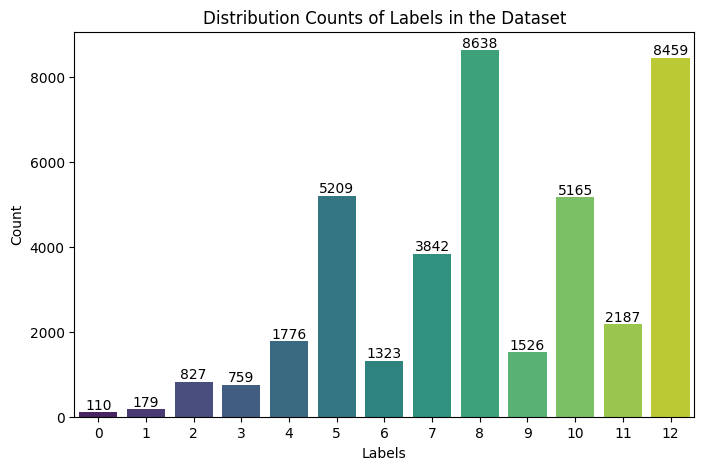

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')  # Use 'viridis' or any other palette

plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution Counts of Labels in the Dataset")
inverted_label_mapping = {v: k for k, v in label_mapping.items()}
tick_labels = [inverted_label_mapping[index] for index in label_counts.index]

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<ipython-input-25-66f49d089959>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


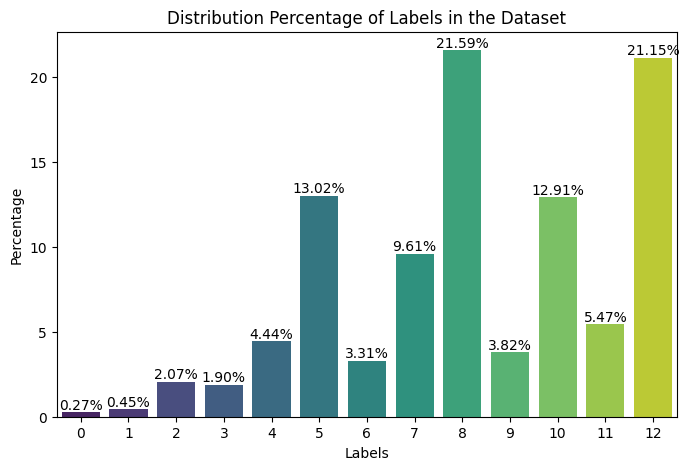

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['label'].value_counts()
total_samples = len(df)
label_percentages = (label_counts / total_samples) * 100
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=label_counts.index,
    y=label_percentages.values,
    palette='viridis'
)
for p in ax.patches:
    percentage = f'{p.get_height():.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        percentage,
        (x, y),
        ha='center',
        va='center',
        fontsize=10,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.xlabel("Labels")
plt.ylabel("Percentage")
plt.title("Distribution Percentage of Labels in the Dataset")
inverted_label_mapping = {v: k for k, v in label_mapping.items()}
tick_labels = [inverted_label_mapping[index] for index in label_counts.index]
plt.show()

In [26]:
total_words = df['sentence'].str.split().str.len().sum()
print(f"Total number of words: {total_words}")

Total number of words: 522948


In [27]:
all_words = ' '.join(df['sentence']).lower().split()
unique_words = set(all_words)
print(f"Number of unique words: {len(unique_words)}")

Number of unique words: 53816


In [28]:
df['sentence'] = df['sentence'].fillna('')
all_words = ' '.join(df['sentence']).lower().split()
unique_words = set(all_words)
print("Unique words in the column:")
print(unique_words)

Unique words in the column:
{'bobbyshirley', 'weep', 'chargerrr', 'seaside', 'iloveyouuu', 'trent', 'nickydiamonds', 'rotc', 'yumcha', 'tsutsu', 'httptwitpiccom4wcpt', 'heatherhal', 'spinning', '_ado', 'sion', 'alyanna', 'mtupyro', 'bampq', 'iviva', 'imwatchingthehannahmoviewithmomshesaidthisfilmverygreat', 'nm', 'slutted', 'frolic', 'scott', 'twitterer', 'electricdog', 'scaree', 'quotback', 'often', 'genos', 'ugggggg', 'butteryum', 'kittin', 'bleeeeah', 'picsiechick', 'pinkbunny69', 'berkeleyy', 'fresa80', 'jameage', 'delas', 'peek_a_bo0', 'quester', 'reimer', 'httpplurkcompx25jw', 'theodorag', 'disastrously', 'dennis', 'mils', 'httptwitpiccom4ja8r', 'argghhh', 'mmmmmmmmm', 'bebe', 'lindsay', 'johnhaydon', 'spat', 'minnesota', 'widespread', 'weapons', 'nulis', 'skwl', 'doha', 'bronte_saurus', 'httptinyurlcomc73ehq', 'corpshavent', 'transactions', 'httpplurkcompstjdg', 'selin162', 'htown', 'tonyt', 'hydra', 'irish1974', 'tastykake', 'ilove', 'carbs', 'doesntt', 'herew', 'quotshortquot'

In [29]:
df['sentence'] = df['sentence'].fillna('')
all_words = ' '.join(df['sentence']).lower().split()
unique_words = set(all_words)
print(f"Number of unique words: {len(unique_words)}")


Number of unique words: 53816


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le_x = LabelEncoder()
# df['label']=le_x.fit_transform(df.label)

# Data Preprocessing

In [30]:
punctuation_chars = "?,।!;:"

def remove_punctuation(text):
    return ''.join(char for char in text if char not in punctuation_chars)

df['sentence'] = df['sentence'].apply(remove_punctuation)


In [31]:
import re
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r"[^\w\s]", "", x))

In [32]:
df['sentence'] = df['sentence'].apply(lambda x: " ".join(x.split()))

In [33]:
total_words = df['sentence'].str.split().str.len().sum()
print(f"Total number of words: {total_words}")

Total number of words: 522948


In [34]:
all_words = ' '.join(df['sentence']).lower().split()
unique_words = set(all_words)
print(f"Number of unique words: {len(unique_words)}")

Number of unique words: 53816


In [35]:
df.isna().sum()

,0
tweet_id,0
label,0
sentence,0


# ML Models using count -Vectorizer

In [36]:
from sklearn.feature_extraction.text import CountVectorizer # import CountVectorizer from sklearn.feature_extraction.text

In [37]:
vectorizer = CountVectorizer(max_features=5000)  # Adjust max_features as needed
X1 = vectorizer.fit_transform(df['sentence'])
y1 = df['label']

X1 = X1.astype(np.float64)


In [40]:
from sklearn.model_selection import train_test_split

# Assuming X1 is your feature data and y1 is your target variable data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

## **Random Forest Model - 60%**

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [43]:
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00        27
           2       0.06      0.01      0.02       145
           3       0.08      0.01      0.01       159
           4       0.12      0.02      0.03       369
           5       0.29      0.31      0.30       978
           6       0.38      0.13      0.19       252
           7       0.45      0.38      0.41       803
           8       0.33      0.55      0.42      1749
           9       0.24      0.05      0.08       310
          10       0.32      0.18      0.23      1074
          11       0.13      0.02      0.04       423
          12       0.31      0.46      0.37      1675

    accuracy                           0.33      8000
   macro avg       0.21      0.16      0.16      8000
weighted avg       0.30      0.33      0.29      8000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## LightGBM Model -62%

In [44]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=1)
lgb_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.369762 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4296
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 1609
[LightGBM] [Info] Start training from score -6.069426
[LightGBM] [Info] Start training from score -5.349611
[LightGBM] [Info] Start training from score -3.848462
[LightGBM] [Info] Start training from score -3.976562
[LightGBM] [Info] Start training from score -3.124276
[LightGBM] [Info] Start training from score -2.023298
[LightGBM] [Info] Start training from score -3.397143
[LightGBM] [Info] Start training from score -2.354207
[LightGBM] [Info] Start training from score -1.535810
[LightGBM] [Info] Start training from score -3.270169
[LightGBM] [Info] Start training from score -2.056946
[LightGBM] [Info] Start training from score -2.898152
[LightGBM] [Info] Start training from score -1.551169


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(random_state=1)

In [45]:
y_pred = lgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.3525
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00        27
           2       0.25      0.01      0.03       145
           3       0.00      0.00      0.00       159
           4       0.17      0.03      0.05       369
           5       0.32      0.38      0.35       978
           6       0.36      0.22      0.28       252
           7       0.49      0.41      0.45       803
           8       0.35      0.59      0.44      1749
           9       0.31      0.07      0.11       310
          10       0.38      0.24      0.29      1074
          11       0.23      0.03      0.06       423
          12       0.33      0.43      0.38      1675

    accuracy                           0.35      8000
   macro avg       0.25      0.19      0.19      8000
weighted avg       0.33      0.35      0.32      8000



## LogisticRegression - 63%

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lgr_model = LogisticRegression(random_state=1)
lgr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [48]:
y_pred = lgr_model.predict(X_test)

In [49]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.340375
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00        27
           2       0.07      0.01      0.01       145
           3       0.05      0.01      0.01       159
           4       0.13      0.05      0.07       369
           5       0.31      0.35      0.33       978
           6       0.31      0.18      0.23       252
           7       0.46      0.38      0.41       803
           8       0.36      0.56      0.44      1749
           9       0.20      0.07      0.10       310
          10       0.33      0.27      0.30      1074
          11       0.14      0.05      0.07       423
          12       0.35      0.42      0.38      1675

    accuracy                           0.34      8000
   macro avg       0.21      0.18      0.18      8000
weighted avg       0.31      0.34      0.32      8000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **SMOTE Sampling Apply**

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X1,y1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [51]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=1)

## Random Forest -86%

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [54]:
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1675
           1       0.98      0.99      0.99      1754
           2       0.80      0.90      0.85      1721
           3       0.90      0.93      0.91      1733
           4       0.88      0.81      0.84      1727
           5       0.62      0.49      0.55      1790
           6       0.91      0.91      0.91      1718
           7       0.73      0.69      0.71      1712
           8       0.33      0.50      0.39      1729
           9       0.88      0.84      0.86      1715
          10       0.68      0.47      0.56      1704
          11       0.87      0.75      0.81      1743
          12       0.36      0.41      0.38      1738

    accuracy                           0.74     22459
   macro avg       0.76      0.74      0.75     22459
weighted avg       0.76      0.74      0.75     22459



## LightGBM Model -81%

In [55]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=1)
lgb_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.685098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147708
[LightGBM] [Info] Number of data points in the train set: 89835, number of used features: 3393
[LightGBM] [Info] Start training from score -2.557364
[LightGBM] [Info] Start training from score -2.568775
[LightGBM] [Info] Start training from score -2.563993
[LightGBM] [Info] Start training from score -2.565729
[LightGBM] [Info] Start training from score -2.564860
[LightGBM] [Info] Start training from score -2.574018
[LightGBM] [Info] Start training from score -2.563559
[LightGBM] [Info] Start training from score -2.562692
[LightGBM] [Info] Start training from score -2.565150
[LightGBM] [Info] Start training from score -2.563125
[LightGBM] [Info] Start training from score -2.561538
[LightGBM] [Info] Start training from score -2.567178
[LightGBM] [Info] Start training from score -2.566453


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(random_state=1)

In [56]:
y_pred = lgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.6339552072665746
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1675
           1       0.96      0.98      0.97      1754
           2       0.63      0.78      0.70      1721
           3       0.80      0.80      0.80      1733
           4       0.68      0.59      0.63      1727
           5       0.42      0.36      0.39      1790
           6       0.81      0.81      0.81      1718
           7       0.59      0.54      0.56      1712
           8       0.32      0.50      0.39      1729
           9       0.72      0.65      0.68      1715
          10       0.49      0.36      0.42      1704
          11       0.70      0.49      0.58      1743
          12       0.35      0.42      0.38      1738

    accuracy                           0.63     22459
   macro avg       0.65      0.64      0.64     22459
weighted avg       0.65      0.63      0.64     22459



## LogisticRegression - 81%

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lgr_model = LogisticRegression(random_state=1)
lgr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [59]:
y_pred = lgr_model.predict(X_test)

In [60]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5775858230553453
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1675
           1       0.88      1.00      0.94      1754
           2       0.47      0.81      0.59      1721
           3       0.61      0.77      0.68      1733
           4       0.53      0.56      0.54      1727
           5       0.46      0.32      0.38      1790
           6       0.70      0.78      0.74      1718
           7       0.55      0.49      0.52      1712
           8       0.24      0.12      0.16      1729
           9       0.56      0.63      0.59      1715
          10       0.45      0.38      0.41      1704
          11       0.54      0.48      0.51      1743
          12       0.36      0.23      0.28      1738

    accuracy                           0.58     22459
   macro avg       0.55      0.58      0.56     22459
weighted avg       0.55      0.58      0.56     22459

